## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.393921  0.738331  0.497284  0.030690 -1.539845 -0.135559
1 -0.746520 -0.071886 -1.597087 -1.031086 -0.900042 -0.815328
2  0.327009 -0.308629  0.957774  0.561434  0.583597  0.911028
3  0.528085  1.043728  0.536111  0.937662  0.266112  1.328463
4  1.240416  1.329565  0.501580  0.448753 -0.877508  0.077283


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9702146	total: 58ms	remaining: 57.9s
1:	learn: 0.9601447	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9497247	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9384822	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9309444	total: 60.1ms	remaining: 12s
5:	learn: 0.9218679	total: 60.6ms	remaining: 10s
6:	learn: 0.9126040	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9030535	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8951405	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8872987	total: 62.7ms	remaining: 6.2s
10:	learn: 0.8769085	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8671206	total: 63.6ms	remaining: 5.23s
12:	learn: 0.8573873	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8498907	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8432341	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8349298	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8271448	total: 66ms	remaining: 3.81s
17:	learn: 0.8192560	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8113353	total: 66.9ms	remaining: 3.45s
1

106:	learn: 0.3842481	total: 107ms	remaining: 896ms
107:	learn: 0.3806724	total: 108ms	remaining: 892ms
108:	learn: 0.3777014	total: 108ms	remaining: 887ms
109:	learn: 0.3744230	total: 109ms	remaining: 882ms
110:	learn: 0.3718101	total: 109ms	remaining: 877ms
111:	learn: 0.3686579	total: 110ms	remaining: 872ms
112:	learn: 0.3659121	total: 110ms	remaining: 866ms
113:	learn: 0.3631327	total: 111ms	remaining: 861ms
114:	learn: 0.3608749	total: 111ms	remaining: 856ms
115:	learn: 0.3586519	total: 112ms	remaining: 852ms
116:	learn: 0.3559585	total: 112ms	remaining: 847ms
117:	learn: 0.3531957	total: 113ms	remaining: 842ms
118:	learn: 0.3510496	total: 113ms	remaining: 839ms
119:	learn: 0.3481080	total: 114ms	remaining: 835ms
120:	learn: 0.3456668	total: 114ms	remaining: 830ms
121:	learn: 0.3436740	total: 115ms	remaining: 825ms
122:	learn: 0.3412513	total: 115ms	remaining: 821ms
123:	learn: 0.3388537	total: 116ms	remaining: 818ms
124:	learn: 0.3363176	total: 116ms	remaining: 814ms
125:	learn: 

268:	learn: 0.1352204	total: 187ms	remaining: 508ms
269:	learn: 0.1338742	total: 188ms	remaining: 508ms
270:	learn: 0.1330833	total: 188ms	remaining: 506ms
271:	learn: 0.1324723	total: 189ms	remaining: 505ms
272:	learn: 0.1317815	total: 189ms	remaining: 504ms
273:	learn: 0.1312441	total: 190ms	remaining: 503ms
274:	learn: 0.1303183	total: 190ms	remaining: 501ms
275:	learn: 0.1293146	total: 191ms	remaining: 500ms
276:	learn: 0.1286152	total: 191ms	remaining: 499ms
277:	learn: 0.1280576	total: 192ms	remaining: 498ms
278:	learn: 0.1274009	total: 192ms	remaining: 496ms
279:	learn: 0.1265266	total: 193ms	remaining: 497ms
280:	learn: 0.1258761	total: 194ms	remaining: 495ms
281:	learn: 0.1251134	total: 194ms	remaining: 494ms
282:	learn: 0.1245222	total: 195ms	remaining: 493ms
283:	learn: 0.1239772	total: 195ms	remaining: 492ms
284:	learn: 0.1234649	total: 195ms	remaining: 490ms
285:	learn: 0.1228781	total: 196ms	remaining: 489ms
286:	learn: 0.1224709	total: 196ms	remaining: 488ms
287:	learn: 

485:	learn: 0.0383229	total: 291ms	remaining: 307ms
486:	learn: 0.0381473	total: 291ms	remaining: 307ms
487:	learn: 0.0379706	total: 292ms	remaining: 306ms
488:	learn: 0.0377356	total: 292ms	remaining: 306ms
489:	learn: 0.0375221	total: 293ms	remaining: 305ms
490:	learn: 0.0374041	total: 293ms	remaining: 304ms
491:	learn: 0.0372019	total: 294ms	remaining: 303ms
492:	learn: 0.0369805	total: 294ms	remaining: 302ms
493:	learn: 0.0367441	total: 295ms	remaining: 302ms
494:	learn: 0.0366307	total: 295ms	remaining: 301ms
495:	learn: 0.0365194	total: 295ms	remaining: 300ms
496:	learn: 0.0364164	total: 296ms	remaining: 299ms
497:	learn: 0.0363211	total: 296ms	remaining: 299ms
498:	learn: 0.0362664	total: 297ms	remaining: 298ms
499:	learn: 0.0360688	total: 297ms	remaining: 297ms
500:	learn: 0.0358761	total: 298ms	remaining: 297ms
501:	learn: 0.0356872	total: 298ms	remaining: 296ms
502:	learn: 0.0354797	total: 299ms	remaining: 295ms
503:	learn: 0.0352907	total: 299ms	remaining: 294ms
504:	learn: 

649:	learn: 0.0201561	total: 370ms	remaining: 199ms
650:	learn: 0.0200714	total: 370ms	remaining: 198ms
651:	learn: 0.0200492	total: 371ms	remaining: 198ms
652:	learn: 0.0199685	total: 371ms	remaining: 197ms
653:	learn: 0.0198551	total: 371ms	remaining: 197ms
654:	learn: 0.0197724	total: 372ms	remaining: 196ms
655:	learn: 0.0197507	total: 372ms	remaining: 195ms
656:	learn: 0.0196722	total: 374ms	remaining: 195ms
657:	learn: 0.0196026	total: 374ms	remaining: 194ms
658:	learn: 0.0195214	total: 374ms	remaining: 194ms
659:	learn: 0.0194116	total: 375ms	remaining: 193ms
660:	learn: 0.0193221	total: 375ms	remaining: 192ms
661:	learn: 0.0193012	total: 376ms	remaining: 192ms
662:	learn: 0.0192059	total: 376ms	remaining: 191ms
663:	learn: 0.0191273	total: 377ms	remaining: 191ms
664:	learn: 0.0191067	total: 377ms	remaining: 190ms
665:	learn: 0.0190239	total: 378ms	remaining: 189ms
666:	learn: 0.0190036	total: 378ms	remaining: 189ms
667:	learn: 0.0189111	total: 379ms	remaining: 188ms
668:	learn: 

863:	learn: 0.0097433	total: 473ms	remaining: 74.5ms
864:	learn: 0.0097049	total: 474ms	remaining: 74ms
865:	learn: 0.0096828	total: 475ms	remaining: 73.4ms
866:	learn: 0.0096611	total: 475ms	remaining: 72.8ms
867:	learn: 0.0096108	total: 475ms	remaining: 72.3ms
868:	learn: 0.0095894	total: 476ms	remaining: 71.7ms
869:	learn: 0.0095468	total: 476ms	remaining: 71.2ms
870:	learn: 0.0095258	total: 477ms	remaining: 70.6ms
871:	learn: 0.0095014	total: 477ms	remaining: 70ms
872:	learn: 0.0094579	total: 478ms	remaining: 69.5ms
873:	learn: 0.0094051	total: 478ms	remaining: 68.9ms
874:	learn: 0.0093663	total: 478ms	remaining: 68.3ms
875:	learn: 0.0093282	total: 479ms	remaining: 67.7ms
876:	learn: 0.0093078	total: 479ms	remaining: 67.2ms
877:	learn: 0.0092705	total: 480ms	remaining: 66.6ms
878:	learn: 0.0092471	total: 480ms	remaining: 66.1ms
879:	learn: 0.0092039	total: 480ms	remaining: 65.5ms
880:	learn: 0.0091619	total: 481ms	remaining: 65ms
881:	learn: 0.0091178	total: 481ms	remaining: 64.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

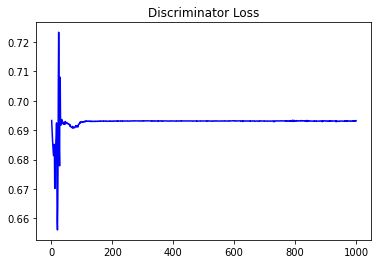

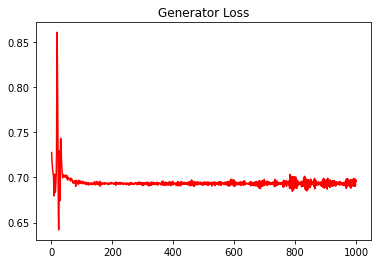

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15209792683827253


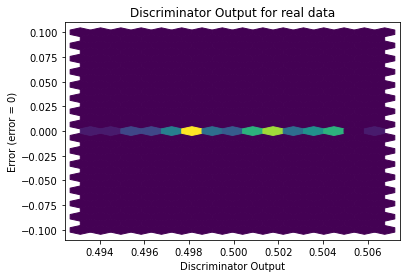

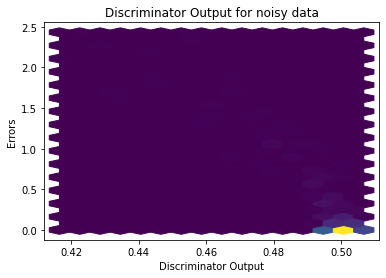

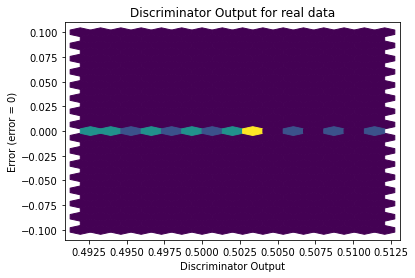

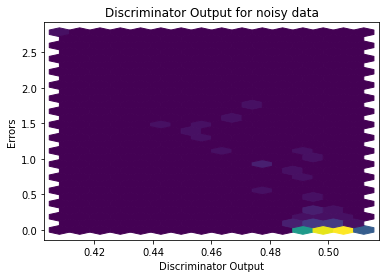

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


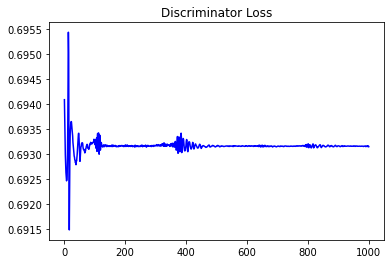

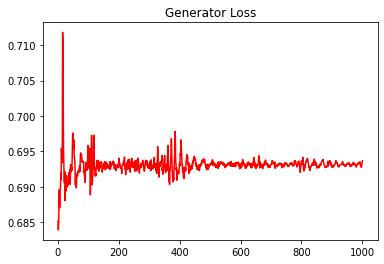

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15954571069979762


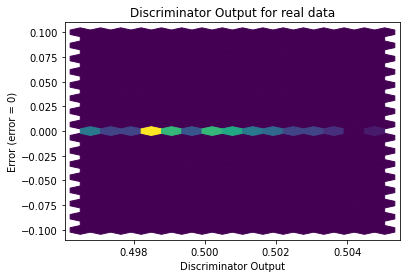

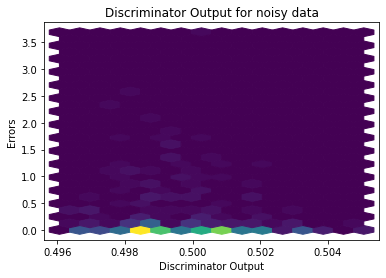

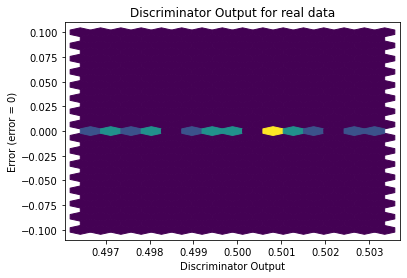

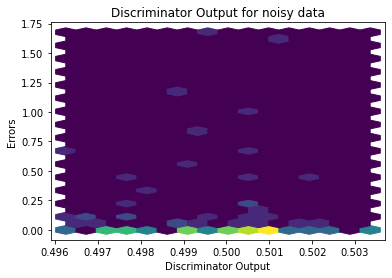

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0446]], requires_grad=True)
